# Implementing my first Speech to Text Model 

Using TensorFlow's version 1 speech commands dataset which includes 65000 one-second long utterances of short words by thousands of different people

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
from IPython.display import Audio
import random
from scipy import fft

warnings.filterwarnings("ignore", category=RuntimeWarning) 

## Implementing Spectogram of synthetic data 

Generating simple synthetic data (no temporal component)

6


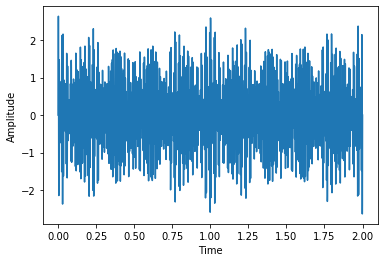

In [229]:
def gensignal(t,  fmax = 1200, fmin = 100, Nmax = 2**4):
    #Fmax: Maximum Frequency 
    #fmin: Min Frequency 
    #Nmax: Maximum number of frequencies audio signal can be made of 
    N = 0 
    while N == 0:
        N = random.randint(0, Nmax) #Audio signal made of N number of signals 
    y = 0 
    print(N)
    freq = []
    amp = []
    for i in range(0, N):
        f = random.randint(fmin, fmax) #Picking frequency between range 
        freq.append(f)
        A = random.random() #Random amplitude the frequency 
        amp.append(A)
        y+= A*np.sin(2*np.pi*f*t)
    return [y, freq, amp]

def plotsignal(t,y):
    plt.plot(t, y)
    plt.ylabel("Amplitude")
    plt.xlabel("Time")

tmax = 2 #Length of audio file
sample_rate = 2000 #Sample 100 points per second
fmin = 100
fmax = 200
Nmax = 2**4
t = np.linspace(0,tmax, sample_rate*tmax)
[sig, freq, amp] = gensignal(t, fmin = fmin, fmax = fmax, Nmax = Nmax)

plotsignal(t, sig )

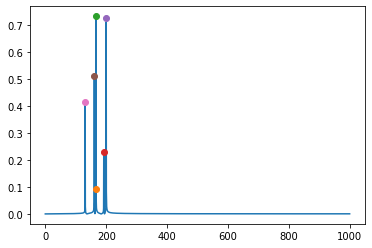

In [230]:
#Verifying Fourier Transform
Y    = np.fft.fft(sig)
N = len(Y)
F = np.fft.fftfreq(len(sig), t[1] - t[0])
F = F[:N//2]
plt.plot( F, 2/N*np.abs(Y[:N//2]) )
#plt.xlim(fmin, fmax)
for i in range(0, len(freq)):
    plt.plot(freq[i], amp[i], 'o')

Generating synthetic data with time component

5
[1637, 201, 1784, 409, 730]
3
[589, 1629, 807]
1
[1462]


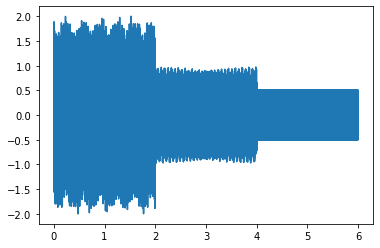

In [284]:
def gensigtemp(segments =5, tseg_max = 2, sample_rate = 4000, fmin = 100, fmax = 200, Nmax = 2**4):
    for i in range(segments):
        t = np.linspace(tseg_max*i, tseg_max*(i+1), sample_rate*tseg_max)
        [sig, freq, amp] = gensignal(t, fmin = fmin, fmax = fmax, Nmax = Nmax)
        print(freq)
        if i == 0:
            final_sig = sig 
            final_t = t
        else:
            final_sig = np.concatenate((final_sig, sig))
            final_t = np.concatenate((final_t, t))
    return [final_t, final_sig]

segments = 3
tseg_max = 2
sample_rate = 4000
fmin = 100
fmax = 2000
Nmax = 5
[t, sig] = gensigtemp(segments = segments, tseg_max = tseg_max, sample_rate = sample_rate, fmin = fmin, fmax = fmax, Nmax = Nmax)
plt.plot(t, sig)
    





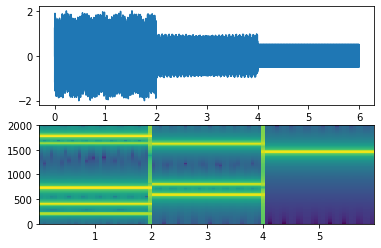

In [292]:
NFFT = 256 # the length of the windowing segments
Fs = sample_rate

fig, (ax1, ax2) = plt.subplots(nrows=2)
ax1.plot(t, sig)
Pxx, freqs, bins, im = ax2.specgram(sig, NFFT=NFFT, Fs=Fs, noverlap=4)
# The `specgram` method returns 4 objects. They are:
# - Pxx: the periodogram
# - freqs: the frequency vector
# - bins: the centers of the time bins
# - im: the matplotlib.image.AxesImage instance representing the data in the plot
plt.show()

# Preliminary Analysis of TensorFlow dataset